In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance_data.csv')

In [3]:
df.head(10)

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
5,5,6,NaN,male,34.4,96,Yes,0,No,northwest,1137.47
6,6,7,NaN,male,37.3,86,Yes,0,No,northwest,1141.45
7,7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80
8,8,9,20.0,male,43.0,86,No,0,No,northwest,1149.40
9,9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46


In [4]:
df.head().size

55

In [5]:
df.isnull().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [6]:
df['age'].fillna(df['age'].mean(),inplace=True)

In [7]:
df['region'].fillna('Unkown',inplace=True)

In [8]:
df.isnull().sum()

index            0
PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

# Distribution for numerical varibale 

<Axes: xlabel='age', ylabel='Count'>

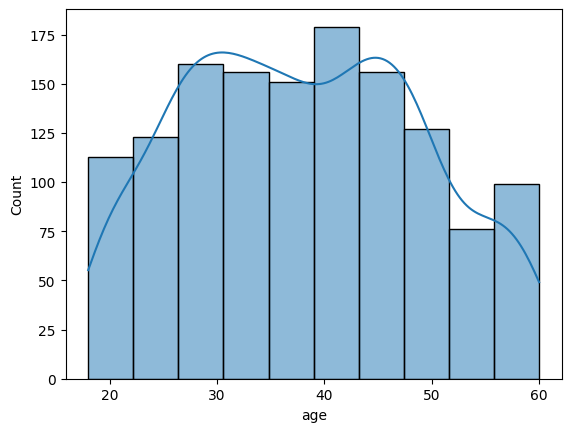

In [9]:
sns.histplot(data = df,x='age',bins = 10 , kde = True)

# Boxplot for age 

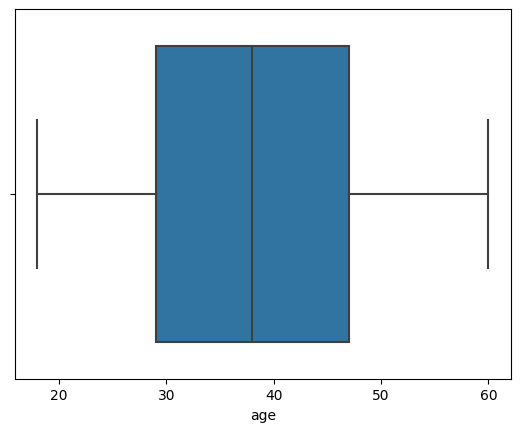

In [10]:
sns.boxplot(x=df["age"])
plt.show()

# Bar chart for categorical variable

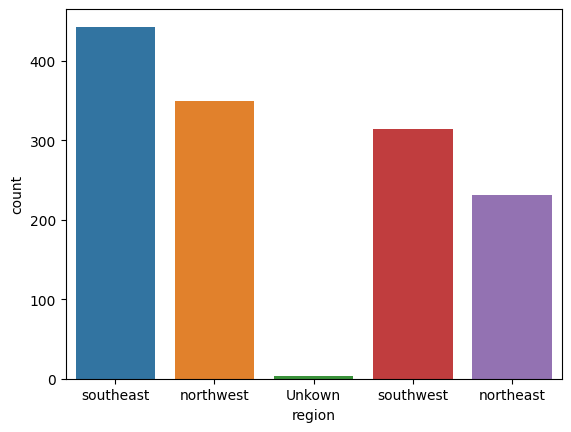

In [11]:
sns.countplot(x='region', data=df)
plt.show()

# Correlation heatmap

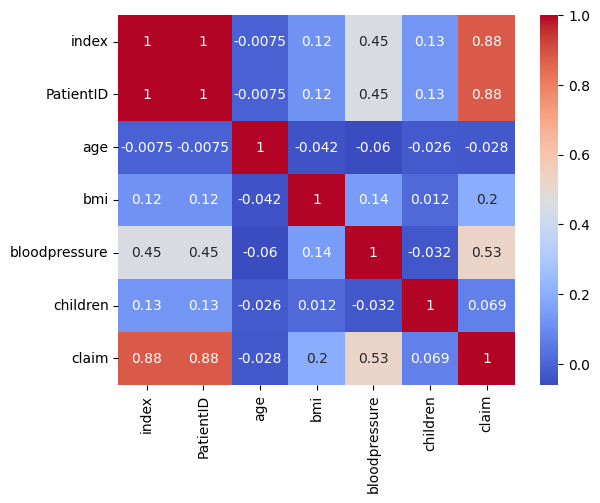

In [12]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Binary encoding 

In [13]:
df['gender'] = df['gender'].map({'male':0,'female':1})

In [14]:
df['smoker'] = df['smoker'].map({'No': 0, 'Yes': 1})

In [19]:
df['diabetic'] = df['diabetic'].map({'No': 0, 'Yes': 1})

# One hot Encoding 

In [16]:
one_hot_encoding = pd.get_dummies(df['region'],prefix='',prefix_sep='')
df= pd.concat([df,one_hot_encoding],axis=1)

In [17]:
df.drop(columns=['region'], inplace=True)

In [20]:
df.head(25)

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,claim,Unkown,northeast,northwest,southeast,southwest
0,0,1,39.000000,0,23.2,91,1,0,0,1121.87,0,0,0,1,0
1,1,2,24.000000,0,30.1,87,0,0,0,1131.51,0,0,0,1,0
2,2,3,38.078652,0,33.3,82,1,0,0,1135.94,0,0,0,1,0
3,3,4,38.078652,0,33.7,80,0,0,0,1136.40,0,0,1,0,0
4,4,5,38.078652,0,34.1,100,0,0,0,1137.01,0,0,1,0,0
5,5,6,38.078652,0,34.4,96,1,0,0,1137.47,0,0,1,0,0
6,6,7,38.078652,0,37.3,86,1,0,0,1141.45,0,0,1,0,0
7,7,8,19.000000,0,41.1,100,0,0,0,1146.80,0,0,1,0,0
8,8,9,20.000000,0,43.0,86,0,0,0,1149.40,0,0,1,0,0
9,9,10,30.000000,0,53.1,97,0,0,0,1163.46,0,0,1,0,0


In [21]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop(columns=['claim']) # Features
y = df['claim'] # Target Varaible

In [25]:
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [26]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1072, 14) (268, 14) (1072,) (268,)


In [27]:
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_squared_error

In [28]:
# Creating a Poisson Regressor model
poisson_model = PoissonRegressor(max_iter=300)

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
# Fitting the model with the training data
poisson_model.fit(X_train, y_train)

# Predicting the claims on the test data
y_pred = poisson_model.predict(X_test)


In [33]:
# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Printing the model's coefficients, intercept, and mean squared error
print("Coefficients:", poisson_model.coef_)
print("Intercept:", poisson_model.intercept_)
print("Mean Squared Error:", mse)

Coefficients: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Intercept: 9.483219840520816
Mean Squared Error: 164629687.35027894


In [34]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model with the training data
gb_model.fit(X_train, y_train)

# Predict the claims on the test data
y_pred_gb = gb_model.predict(X_test)

# Calculate the mean squared error
mse_gb = mean_squared_error(y_test, y_pred_gb)

# Print the mean squared error
print("Mean Squared Error with Gradient Boosting:", mse_gb)


Mean Squared Error with Gradient Boosting: 69097.05194241636


Next Steps:
Hyperparameter Tuning:

You can further fine-tune the hyperparameters of the Gradient Boosting model to achieve a lower MSE. Techniques like grid search or random search can be helpful in finding the optimal set of hyperparameters.
Feature Importance Analysis:

Analyzing the importance of each feature in making predictions can provide insights into the model's decision-making process and help in feature selection or engineering.
Cross-Validation:

Implement cross-validation to get a more robust estimate of the model's performance. It helps in reducing the variance associated with a single train-test split.
Model Evaluation:

Besides MSE, consider evaluating the model using additional metrics like Mean Absolute Error (MAE), R-squared, etc., to have a comprehensive understanding of the model's performance.
Model Interpretation:

If interpretability is crucial, consider using techniques like SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) to interpret the model's predictions.

What is GridSearchCV used for? GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique.

In [36]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Create a Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Create the grid search object
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding mean squared error
print("Best Parameters:", grid_search.best_params_)
print("Best Score (negative mean squared error):", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}
Best Score (negative mean squared error): -89744.77828416103


he values for n_estimators, learning_rate, and max_depth in the parameter grid for grid search are often chosen based on experience, domain knowledge, and experimentation. Here’s how these particular hyperparameters are generally understood:

1. n_estimators:
Description: This is the number of boosting stages or trees to be built. It's a critical parameter as a higher number of trees increases the model's performance but also computational complexity.
Values: [50, 100, 150] are chosen as representative values to start the search. These could be adjusted based on preliminary results and computational resources.
2. learning_rate:
Description: This parameter scales the contribution of each tree. There is a trade-off: a smaller learning rate requires more trees to maintain model performance.
Values: [0.01, 0.1, 0.2] represent a range from a small to a moderately high learning rate. Adjusting these values can help fine-tune model performance and training time.
3. max_depth:
Description: This parameter controls the maximum depth of the decision trees. Deeper trees can model more complex patterns but are also more likely to overfit.
Values: [3, 4, 5] is a reasonable starting point to balance model complexity and risk of overfitting.
Choosing Values:
Literature and Experience: Reviewing literature and past experiences to understand commonly used values.
Preliminary Experiments: Running initial experiments to see how sensitive the model is to these hyperparameters.
Computational Resources: Considering the available computational resources, as a large grid can take a long time to compute.
Problem Complexity: Adjusting based on the complexity of the problem and the dataset.
Adjusting Values:
Expand or Narrow Down: Based on the results of the initial grid search, you can expand or narrow down the search space.
Fine-Tuning: If the best parameters are found on the edge of the parameter grid, it might be beneficial to expand the grid in that direction.
Example:
If the best max_depth from the initial search is 5, you might want to check higher values as well to ensure you are not missing a better set of parameters. Similarly, if the best learning_rate is 0.2, you might want to explore values slightly above and below this to fine-tune the model's performance.